<a href="https://colab.research.google.com/github/jinseriouspark/pricing/blob/main/%5Bdynamic_pricing%5D_01_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynamic pricing - 01. base

[reference : chatGPT]


- 상품이나 서비스의 가격이 수요와 공급에 따라 변하는 것을 말해요.
예를 들어 아이스크림 가게에서 아주 더운 날씨에는 사람들이 아이스크림을 더 많이 사려고 해요. 가게 주인은 가격을 조금 올려도 되겠죠. 반대로 날씨가 추운 날에는 아이스크림을 사려는 사람들이 적을테니 가격을 낮춰 판매를 유도할 수 있겠죠.

- 놀이공원도 생각해볼까요? 주말이나 방학때는 놀이공원에 오는 사람들이 많아 놀이기구의 가격이 비쌀 수 있어요. 평일이나 사람들이 적을때는 가격을 낮춰보면 어떨까요? 그럼 더 많은 사람들이 찾아와 놀이기구를 탈지도 모릅니다.

- 이렇게 수요와 공급에 따라 가격이 변하는 것을 '다이나믹 프라이싱' 이라고 합니다. 판매자들은 더 많은 이익을 얻고, 소비자들도 상황에 맞는 가격으로 물건을 살 수 있어요.


## 쉬운 예제 : 항공권 가격
- 항공권 가격은 dynamic pricing 의 대표적인 사례에요.
항공사는 다음과 같은 요소들을 고려해 가격을 조정하게 됩니다.

1. 수요 : 특정 노선의 수요가 높을 때 가격을 올립니다.
2. 시간 : 출발 날짜가 가까워질 수록 가격을 올리거나 내릴 수 있습니다.
3. 경쟁자 가격 : 다른 항공사의 가격을 모니터링하여 가격을 조정합니다.
4. 좌석 가용성 : 좌석이 많이 남아있으면 가격을 낮추고, 적으면 올립니다.

In [1]:
# 간단한 다이나밍 프라이싱 모델을 구현합니다.
# 수요와 남은 좌석수를 고려하여 가격을 조정하고자 합니다.

import numpy as np

In [2]:
def dynamic_pricing(base_price, demand, remaining_seats):
  # demand 평균을 0.5 로 두고 (랜덤함수 활용해 생성할 예정이기 때문)
  # 평균보다 높으면 올리고, 낮으면 내리는 지표
  demand_factor = 1 + (demand - 0.5)

  # 남은 좌석이 적으면 가격을 올림
  if remaining_seats < 20:
    seat_factor = 1.5
  elif remaining_seats < 50:
    seat_factor = 1.2
  else :
    seat_factor = 1.0

  final_price = base_price * demand_factor * seat_factor
  return final_price


In [5]:
base_price = 100.0
demand = np.random.rand()
remaining_seats = np.random.randint(1, 100)

price = dynamic_pricing(base_price, demand, remaining_seats)
print(f'base_price: ', base_price)
print(f'demand: ', demand)
print(f'remaining_seats: ', remaining_seats)
print(f'price: ',price)

# 현재 수요는 평균보다 높은 0.75이며, 남은 좌석은 4 (20개 미만) 이기 때문에 해당 부분이 반영되어
# 최종가격이 188이 되었음

base_price:  100.0
demand:  0.7576814916721563
remaining_seats:  4
price:  188.65222375082342


In [6]:
# 시각화
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
np.random.seed(717)
time_points = pd.date_range('2024-07-17', periods = 24, freq = 'H')
base_price = 100

price_fluctuations = np.random.normal(loc=0, scale=10, size=len(time_points))
prices = base_price + price_fluctuations.cumsum()

In [11]:
price_fluctuations

array([ 12.87434599,   8.47925668,   0.89372631, -13.9270388 ,
        10.25857037,   5.94340819,   8.911929  ,   0.73195895,
       -16.19888243,  -3.75179626,   6.96025512,  -0.48898375,
        10.00537713,   2.72463596,   2.83007484, -21.51908029,
         1.85452182,  -7.50909562,  -1.32137023,  -7.09087278,
        -9.87445456,   0.30166811,   0.60598162,   3.79724364])

In [9]:
prices

array([112.87434599, 121.35360268, 122.24732899, 108.32029019,
       118.57886055, 124.52226875, 133.43419775, 134.1661567 ,
       117.96727426, 114.215478  , 121.17573312, 120.68674937,
       130.69212651, 133.41676246, 136.2468373 , 114.72775701,
       116.58227883, 109.07318321, 107.75181298, 100.66094019,
        90.78648564,  91.08815375,  91.69413537,  95.49137901])

<Figure size 1000x600 with 0 Axes>

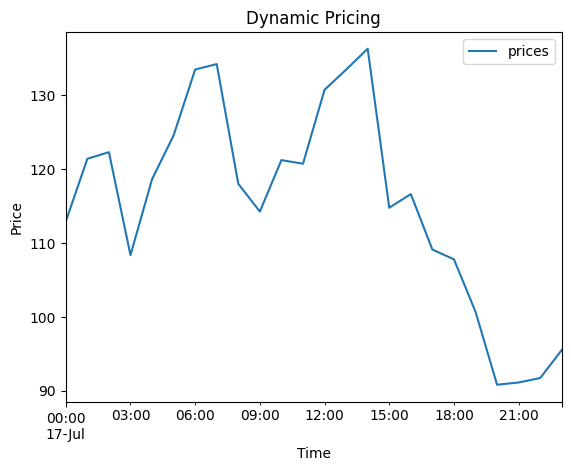

In [13]:
data = pd.DataFrame(data = {'time': time_points, 'prices': prices})
plt.figure(figsize=(10, 6))
data.plot(x='time', y='prices')
plt.title('Dynamic Pricing')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()